In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class Bandit(object):
    def __init__(self, k, q_star_mean=5, policy='e-greedy-0.1', optimistic_init=15, softmax_temp=0.5):
        self.k = k
        self.rewards_mean = np.random.normal(loc=q_star_mean, size=k)
        self.policy = policy
        self.softmax_temp = softmax_temp
        
        self.default = optimistic_init if policy == 'optimistic_init' else 0

        self.sum_r = np.zeros(k)
        self.sum_r[:] = self.default
        self.q = None
        
        self.pulls = np.zeros(k)
        self.pulls_counter = 0
    
    def pull(self):
        self.pulls_counter += 1
        
        arm = self._pick_arm()
        r = self._reward(arm)
        self._update_q(r, arm)
        
        self.pulls[arm] += 1
        
        return r
    
    def get_max_avg_reward(self):
        return np.max(self._get_q())
    
    def _get_q(self, arm=None):
        if arm is not None:
            return self.sum_r[arm]/self.pulls[arm] if self.pulls[arm] > 0 else self.sum_r[arm]
        if self.q is None or self.last_q_update != self.pulls_counter:
            q = self.sum_r/self.pulls
            q[np.isnan(q)]=self.default
            self.q = q
            self.last_q_update = self.pulls_counter
        return self.q
    
    def _pick_arm(self):
        if self.policy == 'e-greedy-0.1':
            if random.random() < 0.1:
                arm = random.randrange(self.k)
            else:
                arm = np.argmax(self._get_q())
        
        elif self.policy == 'e-greedy-0.01':
            if random.random() < 0.01:
                arm = random.randrange(self.k)
            else:
                arm = np.argmax(self._get_q())
                
        elif self.policy == 'optimistic_init':
            arm = np.argmax(self._get_q())
        
        elif self.policy == 'softmax':
            e_q = np.exp(self._get_q()/self.softmax_temp)
            softmax = e_q / e_q.sum()
            arm = np.random.choice(range(self.k), replace=False, p=softmax)
            
        return arm
                
    def _reward(self, arm):
        return np.random.normal(self.rewards_mean[arm])
    
    def _update_q(self, r, arm):
        if self.pulls[arm] > 0:
            self.sum_r[arm] += r
        else:
            self.sum_r[arm] = r
            

In [22]:
arms = 10
num_pulls = 20000
num_bandits = 2000

## Test

In [29]:
bandits = []
for _ in range(num_bandits):
    bandits.append(Bandit(arms, policy='e-greedy-0.01'))
    
avg_rewards = []

for i in range(num_pulls):
    r_sum = 0
    for bandit in bandits:
        r = bandit.pull()
        r_sum += r #bandit.get_max_avg_reward()
    avg_r = r_sum/num_bandits
    avg_rewards.append(avg_r)
    
    if i % 100 == 0:
        print(i, avg_r)

/Users/volterr/anaconda/envs/rl/lib/python3.6/site-packages/ipykernel/__main__.py:35: RuntimeWarning: invalid value encountered in true_divide


0 5.024500555221533
100 5.408204999914021
200 5.589081070831037
300 5.73974482470764
400 5.87534095644768
500 5.9492233651080655
600 6.063230637722958
700 6.035373734484112
800 6.078847381248334
900 6.177741410554352
1000 6.187351209249867
1100 6.215657065697699
1200 6.228185510573371
1300 6.263789133987442
1400 6.316903361384965
1500 6.331483236309602
1600 6.319377429404156
1700 6.325387616794928
1800 6.380612924730566
1900 6.387521790015337
2000 6.359559471635279
2100 6.387738500496614
2200 6.401454631770263
2300 6.431713896589539
2400 6.394771074103301
2500 6.387674257068882
2600 6.428721887507267
2700 6.467138131270366
2800 6.4328314240500495
2900 6.4022885708037975
3000 6.475446898595961
3100 6.4709938460357055
3200 6.462793467232671
3300 6.459013738921321
3400 6.469585514818335
3500 6.448671653664737
3600 6.43550666409034
3700 6.482055315540824
3800 6.411199781684072
3900 6.439402775576159
4000 6.503507510666647
4100 6.465597249421447
4200 6.4529468403020855
4300 6.45376776114004

In [30]:
df = pd.DataFrame({'avg_reward': avg_rewards})
np.max(avg_rewards)

6.6129671037450963

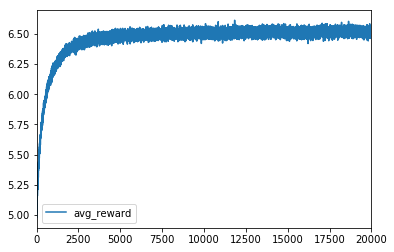

In [31]:
df.plot()
plt.show()